## پانڈاز کی بنیادی مثالیں

یہ نوٹ بک آپ کو پانڈاز کے کچھ بہت بنیادی تصورات سے آگاہ کرے گی۔ ہم عام ڈیٹا سائنس لائبریریوں کو درآمد کرنے سے شروع کریں گے:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### سیریز

سیریز ایک فہرست یا 1D-ارے کی طرح ہے، لیکن اس میں انڈیکس ہوتا ہے۔ تمام آپریشنز انڈیکس کے ساتھ منسلک ہوتے ہیں۔


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


سیریز کے عام استعمالات میں سے ایک **ٹائم سیریز** ہے۔ ٹائم سیریز میں، انڈیکس کی ایک خاص ساخت ہوتی ہے - عام طور پر تاریخوں یا ڈیٹ ٹائمز کی ایک رینج۔ ہم `pd.date_range` کے ذریعے ایسا انڈیکس بنا سکتے ہیں۔

فرض کریں کہ ہمارے پاس ایک سیریز ہے جو ہر دن خریدے گئے پروڈکٹ کی مقدار دکھاتی ہے، اور ہمیں معلوم ہے کہ ہر اتوار کو ہمیں اپنے لیے بھی ایک آئٹم لینا ہوتا ہے۔ یہاں یہ دکھایا گیا ہے کہ سیریز کا استعمال کرتے ہوئے اسے کیسے ماڈل کیا جا سکتا ہے:


Length of index is 366


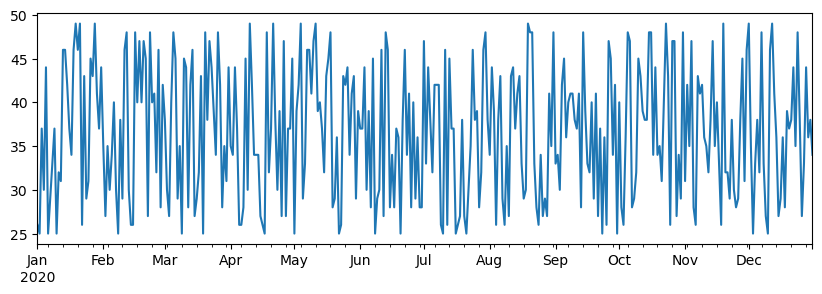

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


جیسا کہ آپ دیکھ سکتے ہیں، ہمیں یہاں مسائل کا سامنا ہے، کیونکہ ہفتہ وار سلسلے میں غیر ذکر شدہ دنوں کو غائب (`NaN`) سمجھا جاتا ہے، اور ایک نمبر میں `NaN` شامل کرنے سے ہمیں `NaN` ملتا ہے۔ درست نتیجہ حاصل کرنے کے لیے، ہمیں سلسلے کو شامل کرتے وقت `fill_value` کی وضاحت کرنی ہوگی:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


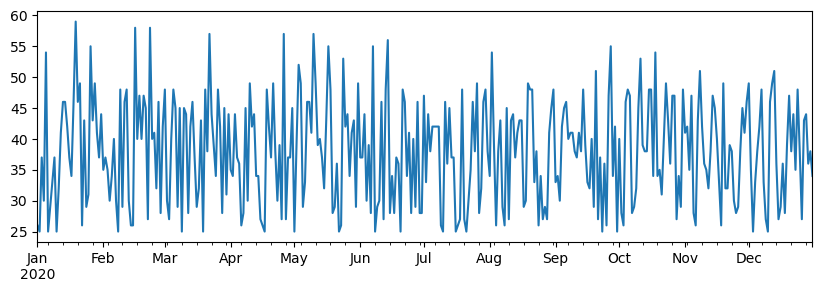

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

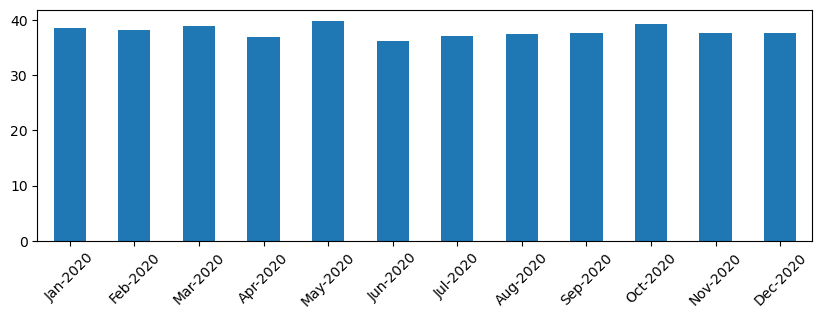

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## ڈیٹا فریم

ڈیٹا فریم بنیادی طور پر ایک ہی انڈیکس کے ساتھ سیریز کا مجموعہ ہوتا ہے۔ ہم کئی سیریز کو ایک ساتھ ملا کر ایک ڈیٹا فریم بنا سکتے ہیں۔ اوپر دی گئی `a` اور `b` سیریز کے مطابق:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

ہم سیریز کو کالمز کے طور پر بھی استعمال کر سکتے ہیں، اور لغت کے ذریعے کالم کے ناموں کی وضاحت کر سکتے ہیں۔


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

اسی نتیجہ حاصل کیا جا سکتا ہے کالمز کو تبدیل کر کے (اور پھر نام تبدیل کر کے، پچھلی مثال کے مطابق):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

ڈیٹا فریم سے **کالمز کا انتخاب** اس طرح کیا جا سکتا ہے:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**فلٹر اظہار** کی بنیاد پر قطاریں منتخب کرنا:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

جس طرح یہ کام کرتا ہے وہ یہ ہے کہ اظہار `df['A']<5` ایک بولین سیریز واپس کرتا ہے، جو یہ ظاہر کرتا ہے کہ سیریز کے ہر عنصر کے لئے اظہار `True` یا `False` ہے۔ جب سیریز کو بطور انڈیکس استعمال کیا جاتا ہے، تو یہ ڈیٹا فریم میں قطاروں کا ذیلی سیٹ واپس کرتا ہے۔ لہذا، کسی بھی عام Python بولین اظہار کو استعمال کرنا ممکن نہیں ہے، مثال کے طور پر، `df[df['A']>5 and df['A']<7]` لکھنا غلط ہوگا۔ اس کے بجائے، آپ کو بولین سیریز پر خاص `&` آپریشن استعمال کرنا چاہئے:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

نئے قابل حساب کالمز بنانا۔ ہم آسانی سے اپنے ڈیٹا فریم کے لئے نئے قابل حساب کالمز بنا سکتے ہیں، صرف واضح اظہارات استعمال کرتے ہوئے۔ نیچے دیا گیا کوڈ A کی اس کے اوسط قدر سے انحراف کو حساب کرتا ہے۔


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

ہم اصل میں ایک سلسلہ حساب کر رہے ہیں، اور پھر اس سلسلے کو بائیں جانب تفویض کر رہے ہیں، جس سے ایک اور کالم تخلیق ہو رہا ہے۔


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

قطاروں کا انتخاب نمبروں کی بنیاد پر `iloc` کنسٹرکٹ استعمال کرتے ہوئے کیا جا سکتا ہے۔ مثال کے طور پر، ڈیٹا فریم سے پہلی 5 قطاروں کو منتخب کرنے کے لیے:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

گروپنگ اکثر ایکسل میں *پیوٹ ٹیبلز* جیسا نتیجہ حاصل کرنے کے لئے استعمال کی جاتی ہے۔ فرض کریں کہ ہم `LenB` کے ہر دیے گئے نمبر کے لئے کالم `A` کی اوسط قیمت کا حساب لگانا چاہتے ہیں۔ تو ہم اپنے ڈیٹا فریم کو `LenB` کے ذریعے گروپ کر سکتے ہیں، اور `mean` کو کال کر سکتے ہیں۔


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

اگر ہمیں گروپ میں اوسط اور عناصر کی تعداد کا حساب لگانا ہو، تو ہم زیادہ پیچیدہ `aggregate` فنکشن استعمال کر سکتے ہیں:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## پرنٹنگ اور پلاٹنگ

ڈیٹا سائنسدان اکثر ڈیٹا کو دریافت کرتے ہیں، اس لیے اسے بصری طور پر دیکھنا ضروری ہوتا ہے۔ جب ڈیٹا فریم بڑا ہو، تو کئی بار ہم صرف یہ یقینی بنانا چاہتے ہیں کہ ہم سب کچھ درست کر رہے ہیں، اس کے لیے پہلے چند قطاریں پرنٹ کر لیتے ہیں۔ یہ `df.head()` کو کال کر کے کیا جا سکتا ہے۔ اگر آپ اسے جیوپیٹر نوٹ بک سے چلا رہے ہیں، تو یہ ڈیٹا فریم کو ایک خوبصورت جدول کی شکل میں پرنٹ کرے گا۔


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

ہم نے کچھ کالمز کو دیکھنے کے لیے `plot` فنکشن کے استعمال کا بھی مشاہدہ کیا ہے۔ اگرچہ `plot` بہت سے کاموں کے لیے انتہائی مفید ہے اور `kind=` پیرامیٹر کے ذریعے مختلف قسم کے گرافز کو سپورٹ کرتا ہے، آپ ہمیشہ کچھ زیادہ پیچیدہ گراف بنانے کے لیے خام `matplotlib` لائبریری کا استعمال کر سکتے ہیں۔ ہم ڈیٹا ویژولائزیشن کو تفصیل سے الگ کورس کے اسباق میں کور کریں گے۔


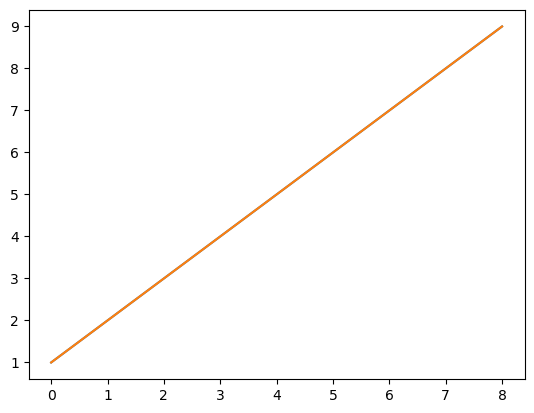

In [61]:
df['A'].plot()
plt.show()

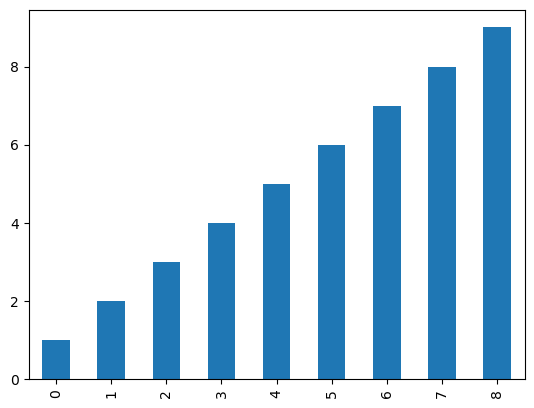

In [63]:
df['A'].plot(kind='bar')
plt.show()

یہ جائزہ پانڈاز کے سب سے اہم تصورات کا احاطہ کرتا ہے، تاہم، یہ لائبریری بہت وسیع ہے، اور اس کے ساتھ آپ جو کچھ کر سکتے ہیں اس کی کوئی حد نہیں ہے! آئیے اب اس علم کو مخصوص مسئلے کو حل کرنے کے لیے استعمال کریں۔



---

**ڈسکلیمر**:  
یہ دستاویز AI ترجمہ سروس [Co-op Translator](https://github.com/Azure/co-op-translator) کا استعمال کرتے ہوئے ترجمہ کی گئی ہے۔ ہم درستگی کے لیے کوشش کرتے ہیں، لیکن براہ کرم آگاہ رہیں کہ خودکار ترجمے میں غلطیاں یا غیر درستیاں ہو سکتی ہیں۔ اصل دستاویز کو اس کی اصل زبان میں مستند ذریعہ سمجھا جانا چاہیے۔ اہم معلومات کے لیے، پیشہ ور انسانی ترجمہ کی سفارش کی جاتی ہے۔ ہم اس ترجمے کے استعمال سے پیدا ہونے والی کسی بھی غلط فہمی یا غلط تشریح کے ذمہ دار نہیں ہیں۔
